In [1]:
# 导包
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_path = "./"

In [3]:
print(os.listdir(train_path))

['.ipynb_checkpoints', '0-6.csv', '7-9.csv', 'CNN+LSTM=数据9在第一位 64-0712最新修改.ipynb', 'CNN+LSTM=数据9在第一位 64-0712最新修改导入模型.ipynb', 'data', 'graphviz.ipynb', 'GRU.h5', 'GRU0712.h5', 'GRU071236-15.h5', 'GRU071236-15原始.h5', 'GRU=数据0在第一位-修改0712.ipynb', 'GRU=数据0在第一位.ipynb', 'GRU=数据1在第一位.ipynb', 'GRU=数据2在第一位.ipynb', 'GRU=数据3在第一位.ipynb', 'GRU=数据4在第一位.ipynb', 'GRU=数据5在第一位.ipynb', 'GRU=数据6在第一位.ipynb', 'GRU=数据7在第一位.ipynb', 'GRU=数据8在第一位 -64-0712最新修改.ipynb', 'GRU=数据8在第一位.ipynb', 'GRU=数据9在第一位 - 修改0712.ipynb', 'GRU=数据9在第一位.ipynb', 'lstm.png', 'MLP=数据9在第一位 64-0712最新修改.ipynb', 'model.h5', 'modelnew.h5', 'SMOTE.ipynb', 'Untitled.ipynb', '数据合并.ipynb', '数据拆分.ipynb', '模型保存']


In [4]:
# 读取文件


#dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')


data = pd.read_csv('./data/SMOTE数据拆分7699数据扩充数据合并/9在第一位.csv')
#data = pd.read_csv('./data/SMOTE数据拆分7699/0-8.csv')
data

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,142,1.0,29,2190,190057400,3.0,0,50,28,24.3,...,1,64,0,198.4,3145920,-1.93,0.96,0,0,0
1,143,1.0,29,2190,190058400,4.0,0,50,28,24.2,...,1,64,0,198.1,3145920,-1.83,0.77,0,0,0
2,150,1.0,29,2190,190065400,11.0,0,50,28,24.3,...,1,64,0,201.7,3145920,-0.41,0.02,0,0,0
3,160,1.0,29,2190,190075400,21.0,0,50,28,24.3,...,1,64,0,197.1,3145920,0.49,0.19,0,0,0
4,169,1.0,29,2190,190084400,30.0,0,50,28,24.1,...,1,64,0,201.3,3145920,-0.11,1.37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,90,1.0,29,2190,190005400,6504.6,0,50,28,24.3,...,1,64,0,202.0,3145920,-0.46,1.04,0,0,0
12450,94,1.0,29,2190,190009400,6508.6,0,50,28,24.4,...,1,64,0,201.3,3145920,-0.31,1.36,0,0,0
12451,101,1.0,29,2190,190016400,6515.6,0,50,28,24.2,...,1,64,0,198.3,3145920,-1.11,1.26,0,0,0
12452,119,1.0,29,2190,190034400,6533.6,0,50,28,24.3,...,1,64,0,197.4,3145920,0.30,-0.13,0,0,0


In [5]:
# 查看前5行数据
data.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,142,1.0,29,2190,190057400,3.0,0,50,28,24.3,...,1,64,0,198.4,3145920,-1.93,0.96,0,0,0
1,143,1.0,29,2190,190058400,4.0,0,50,28,24.2,...,1,64,0,198.1,3145920,-1.83,0.77,0,0,0
2,150,1.0,29,2190,190065400,11.0,0,50,28,24.3,...,1,64,0,201.7,3145920,-0.41,0.02,0,0,0
3,160,1.0,29,2190,190075400,21.0,0,50,28,24.3,...,1,64,0,197.1,3145920,0.49,0.19,0,0,0
4,169,1.0,29,2190,190084400,30.0,0,50,28,24.1,...,1,64,0,201.3,3145920,-0.11,1.37,0,0,0


In [6]:
data.index

RangeIndex(start=0, stop=12454, step=1)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count           12454 non-null  int64  
 1   gpsPdop         12454 non-null  float64
 2   gpsNumSv        12454 non-null  int64  
 3   gpsWeek         12454 non-null  int64  
 4   itow            12454 non-null  int64  
 5   gpsSec          12454 non-null  float64
 6   P_Sol_Status    12454 non-null  int64  
 7   Pos_Type        12454 non-null  int64  
 8   AvionicsTemp    12454 non-null  int64  
 9   MainPowerV      12454 non-null  float64
 10  ServPowerV      12454 non-null  float64
 11  powerV          12454 non-null  float64
 12  APGlobalStatus  12454 non-null  int64  
 13  GPSStatus       12454 non-null  int64  
 14  mpStatus        12454 non-null  int64  
 15  cmd             12454 non-null  int64  
 16  Lat             12454 non-null  float64
 17  Lon             12454 non-null 

In [8]:
## 去除缺失数据
#A = data.dropna(axis=0, how='any', inplace=True)

In [9]:
print(data)

       count  gpsPdop  gpsNumSv  gpsWeek       itow  gpsSec  P_Sol_Status  \
0        142      1.0        29     2190  190057400     3.0             0   
1        143      1.0        29     2190  190058400     4.0             0   
2        150      1.0        29     2190  190065400    11.0             0   
3        160      1.0        29     2190  190075400    21.0             0   
4        169      1.0        29     2190  190084400    30.0             0   
...      ...      ...       ...      ...        ...     ...           ...   
12449     90      1.0        29     2190  190005400  6504.6             0   
12450     94      1.0        29     2190  190009400  6508.6             0   
12451    101      1.0        29     2190  190016400  6515.6             0   
12452    119      1.0        29     2190  190034400  6533.6             0   
12453    137      1.0        29     2190  190052400  6551.6             0   

       Pos_Type  AvionicsTemp  MainPowerV  ...  rcState  Failure_ad  leftRP

C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jammer')

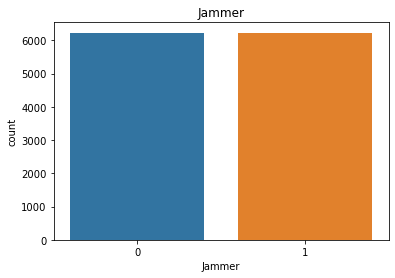

In [10]:
# 样本分布
# 以图方式表示
sns.countplot(data["Jammer"])
plt.xlabel("Jammer")
plt.title("Jammer")

In [11]:
# 重新排序
# df = data.sample(frac=1).reset_index(drop=True)

In [12]:
#A = data

In [13]:
# 数据清洗
A = data.loc[:, (data != 0).any(axis=0)]#删除数据全部为0的列
del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']
data = A
print(data)

       gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0          1.0        29     3.0             0            28  40.072993   
1          1.0        29     4.0             0            28  40.072850   
2          1.0        29    11.0             0            28  40.072293   
3          1.0        29    21.0             0            28  40.073505   
4          1.0        29    30.0             0            28  40.074564   
...        ...       ...     ...           ...           ...        ...   
12449      1.0        29  6504.6             0            28  40.074574   
12450      1.0        29  6508.6             0            28  40.074253   
12451      1.0        29  6515.6             0            28  40.073133   
12452      1.0        29  6533.6             0            28  40.073304   
12453      1.0        29  6551.6             0            28  40.073830   

              Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  \
0      116.103066  198.0

In [14]:
df = data

In [15]:
# 空值检查
# df[df.isnull().values==True]

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
## 划分数据集
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [18]:
x_train = x
y_train = y
x_train.shape

(12454, 36)

In [19]:
x_train.head()
#x_train.to_csv('./data/SMOTE数据拆分7699数据扩充数据合并/训练集8在第一位降维.csv',index=False)

,gpsPdop,gpsNumSv,gpsSec,P_Sol_Status,AvionicsTemp,Lat,Lon,H,tas,Eu[0],...,aileronLeftCmd,elevatorCmd,rudderCmd,lonCmd,XaccBias,YaccBias,ZaccBias,AirHeight,WWest,WSouth
0,1.0,29,3.0,0,28,40.072993,116.103066,198.0,19.92,-13.590559,...,2.652795,-2.160051,-1.105809,0.0,0.0,0.0,0.0,198.4,-1.93,0.96
1,1.0,29,4.0,0,28,40.072850,116.103176,198.1,19.65,-12.014925,...,2.223076,-1.873572,-1.054242,0.0,0.0,0.0,0.0,198.1,-1.83,0.77
2,1.0,29,11.0,0,28,40.072293,116.104514,201.1,20.85,-18.684154,...,1.879302,-1.512609,-1.518338,0.0,0.0,0.0,0.0,201.7,-0.41,0.02
3,1.0,29,21.0,0,28,40.073505,116.105935,197.0,19.82,-16.953821,...,2.681442,-2.028271,-1.243318,0.0,0.0,0.0,0.0,197.1,0.49,0.19
4,1.0,29,30.0,0,28,40.074564,116.104542,201.3,19.98,-15.527156,...,2.119944,-1.546986,-1.575634,0.0,0.0,0.0,0.0,201.3,-0.11,1.37


In [20]:
dataset = pd.read_csv('./data/SMOTE数据拆分7699/8.csv')
dataset.shape


(769, 65)

In [21]:
#from sklearn.utils import shuffle  
#data= shuffle(data) 
#data.head()

In [22]:
# 数据清洗

A = dataset.loc[:, (dataset != 0).any(axis=0)]#删除数据全部为0的列

del A['count']
del A['gpsWeek']
del A['itow']
del A['Pos_Type']
del A['MainPowerV']
del A['ServPowerV']
del A['powerV']
del A['APGlobalStatus']
del A['GPSStatus']
del A['cmd']
del A['StaticP']
del A['throttleCmd']
del A['latCmd']
del A['pedCmd']
del A['throtCmd']
del A['Aileron']
del A['Elevator']
del A['Throttle']
##del A['Rudder']
#del A['photoNum']
#del A['rcState']
del A['mpStatus']
del A['Action']
del A['rcState']
del A['Failure_ad']
del A['Failure']


dataset = A

print(dataset)
#dataset.to_csv('./data/SMOTE数据拆分7699数据扩充数据合并/测试集7在第一位降维.csv',index=False)

     gpsPdop  gpsNumSv  gpsSec  P_Sol_Status  AvionicsTemp        Lat  \
0        1.0        31  1210.2             0            28  40.071637   
1        1.0        31  1223.2             0            28  40.072354   
2        1.0        31  1272.2             0            29  40.072341   
3        1.0        32  2793.6             0            31  40.073017   
4        1.0        30  2207.4             0            30  40.071729   
..       ...       ...     ...           ...           ...        ...   
764      5.0        18   595.8            13            47  40.136965   
765      1.0        31   786.2             0            21  40.070674   
766      2.5         8  5969.2             0            37  40.140445   
767      5.0        18   421.0            13            46  40.137040   
768      1.0        32  2874.6             0            31  40.069540   

            Lon      H    tas      Eu[0]  ...  elevatorCmd  rudderCmd  lonCmd  \
0    116.108722  177.0  19.58 -12.393077  

In [23]:
x_test = dataset.iloc[:,:-1]
y_test = dataset.iloc[:,-1]

In [24]:
x_test.shape

(769, 36)

In [25]:
# 数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12454, 36)
(12454,)
(769, 36)
(769,)


In [27]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=36)


#数据的标准化
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)#各个成分方差值
print(sum(var_ratio))#成分方差总和

[[-0.18820559  1.01249942 -1.39601634 ...  1.3522794  -0.9176386
   0.1539243 ]
 [-0.18820559  1.01249942 -1.39561921 ...  1.34876113 -0.88442678
   0.09571758]
 [-0.18820559  1.01249942 -1.39283927 ...  1.39098032 -0.41281897
  -0.13404578]
 ...
 [-0.18820559  1.01249942  1.19035969 ...  1.35110664 -0.64530169
   0.24582964]
 [-0.18820559  1.01249942  1.19750811 ...  1.34055184 -0.17701506
  -0.17999845]
 [-0.18820559  1.01249942  1.20465653 ...  1.38159828 -0.4991697
   0.23357559]]
[1.45785117e+01 3.28364749e+00 2.79498400e+00 1.86774861e+00
 1.61720314e+00 1.39185004e+00 1.11025441e+00 1.02309966e+00
 1.00845330e+00 9.36447528e-01 8.30592385e-01 7.39130118e-01
 6.85772956e-01 5.43796315e-01 4.85894858e-01 4.49483759e-01
 4.31396583e-01 4.16276437e-01 3.64983226e-01 3.28958236e-01
 2.52992916e-01 2.04787916e-01 1.67223281e-01 1.16111270e-01
 8.65197088e-02 7.75388201e-02 5.34981406e-02 4.52821493e-02
 2.72485867e-02 2.60595105e-02 2.06776554e-02 1.53469384e-02
 8.72101746e-03 6.3232

(12454, 15)
[0.40492614 0.09120511 0.07763221 0.05187774 0.0449187  0.0386594
 0.03083792 0.02841715 0.02801034 0.02601034 0.02307016 0.02052974
 0.01904772 0.01510424 0.013496  ]
<class 'numpy.ndarray'>
0.9136


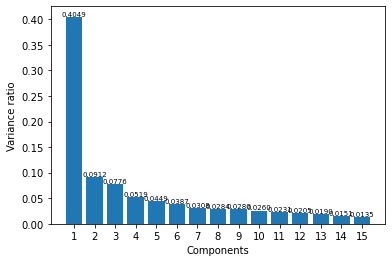

In [28]:
# 训练集数据降维到25维
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape)


#print(X_test_pca.shape)


# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 16))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
#plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
#                                   "16","17","18","19","20","21","22","23","24","25"])
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

In [29]:
#X_norm = StandardScaler().fit_transform(X_test)
#X_test_pca = pca.fit_transform(X_norm)
##X_test_pca = pca.fit_transform(X_test)
#
#print(X_test_pca)
#print(X_test_pca.shape)

In [30]:
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(769, 15)


In [31]:
# 对数据处理
from keras.utils import np_utils

X_train = X_train_pca.reshape((-1,1,15))
Y_train = np_utils.to_categorical(y_train)
X_test = X_test_pca.reshape((-1,1,15))
Y_test = np_utils.to_categorical(y_test)


In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(12454, 1, 15)
(12454, 2)
(769, 1, 15)
(769, 2)


In [33]:
X_train = np.expand_dims(X_train, axis=2)
Y_train = np.expand_dims(Y_train, axis=1)
X_test = np.expand_dims(X_test, axis=2)
Y_test = np.expand_dims(Y_test, axis=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12454, 1, 1, 15)
(12454, 1, 2)
(769, 1, 1, 15)
(769, 1, 2)


In [34]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten
from keras.layers.recurrent import GRU
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import RepeatVector, TimeDistributed,Conv1D,MaxPooling1D



model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(None,1,15))))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))
model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.25))

 
model.add(Dense(units=64))
#model.add(Dropout(0.25))
model.add(Dense(units=16))
#model.add(Dropout(0.25))
model.add(Dense(units=8))
#model.add(Dropout(0.25))

model.add(Dense(units=2,activation="sigmoid"))

In [35]:
# Implement Learning rate decay
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

checkpoint = ModelCheckpoint("./模型保存/CNN+LSTM9为第一位20230520.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta =0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1)
                              #min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [36]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_fit = model.fit(x=X_train, 
                        y=Y_train, 
                        batch_size=8, 
                        epochs=30, 
                        verbose=1, 
                        validation_data=(X_test, Y_test),
                        callbacks=callbacks)

Epoch 1/30
1557/1557 [==============================] - 8s 3ms/step - loss: 0.1077 - accuracy: 0.9590 - val_loss: 0.0623 - val_accuracy: 0.9792

Epoch 00001: val_loss improved from inf to 0.06225, saving model to ./模型保存\CNN+LSTM9为第一位.h5
Epoch 2/30
1557/1557 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9819 - val_loss: 0.0443 - val_accuracy: 0.9831

Epoch 00002: val_loss improved from 0.06225 to 0.04430, saving model to ./模型保存\CNN+LSTM9为第一位.h5
Epoch 3/30
1557/1557 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9847 - val_loss: 0.0339 - val_accuracy: 0.9857

Epoch 00003: val_loss improved from 0.04430 to 0.03390, saving model to ./模型保存\CNN+LSTM9为第一位.h5
Epoch 4/30
1557/1557 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9868 - val_loss: 0.0388 - val_accuracy: 0.9870

Epoch 00004: val_loss did not improve from 0.03390
Epoch 5/30
1557/1557 [==============================] - 4s 2ms/step - loss: 0.0348 - 

In [38]:
# 画曲线
def plot_performance(history=None,figure_directory=None,ylim_pad=[0,0]):
    xlabel="Epoch"
    legends=["Training","Validation"]
    
    plt.figure(figsize=(20,5))
    
    y1=history.history["accuracy"]
    y2=history.history["val_accuracy"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[0]
    max_y=max(max(y1),max(y2))+ylim_pad[0]
    
    plt.subplot(121)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Accuracy\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    
    y1=history.history["loss"]
    y2=history.history["val_loss"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[1]
    max_y=max(max(y1),max(y2))+ylim_pad[1]
    
    plt.subplot(122)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Loss:\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Loss",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    plt.show()


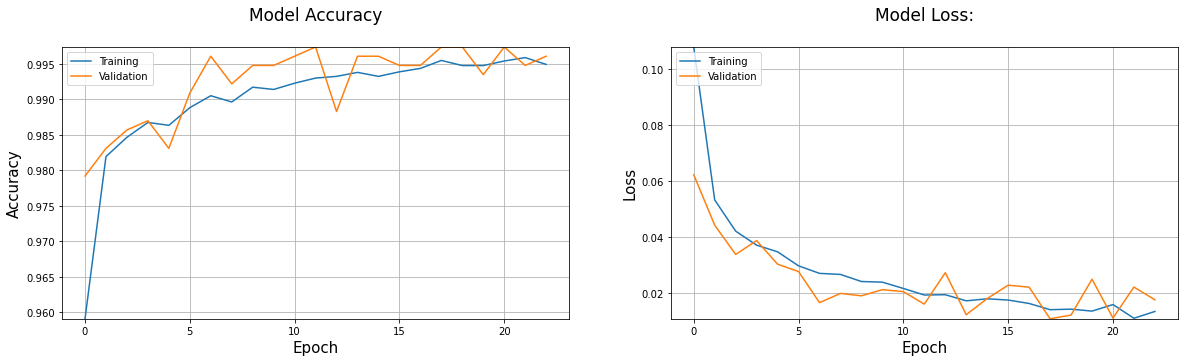

In [39]:
# 可视化
plot_performance(history=history_fit)

In [40]:
##导入保存模型
#from keras import models 
#from keras.models import load_model
#
#
#model = load_model('model.h5')

In [41]:
# 预测
# predict_y = (model.predict(X_test) > 0.5)*1 
# predict_y = np.around(predict_y) # np.around
predict_y = model.predict_classes(X_test)

C:\Users\SUN\anaconda3\envs\LSTM\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
predict_y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [43]:
print(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
764    1
765    0
766    0
767    1
768    0
Name: Jammer, Length: 769, dtype: int64


In [44]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test,predict_y,digits=4))


              precision    recall  f1-score   support

           0     1.0000    0.9971    0.9985       687
           1     0.9762    1.0000    0.9880        82

    accuracy                         0.9974       769
   macro avg     0.9881    0.9985    0.9932       769
weighted avg     0.9975    0.9974    0.9974       769



In [45]:
from sklearn.metrics import confusion_matrix

a = confusion_matrix(predict_y, y_test)
print(a)

[[685   0]
 [  2  82]]


In [46]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy_pca = accuracy_score(predict_y, y_test)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(predict_y, y_test)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(predict_y, y_test)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(predict_y, y_test)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

PCA测试集准确率: 0.9974


PCA测试集精确率: 1.0000


PCA测试集召回率: 0.9762


PCA测试集F1值: 0.9880


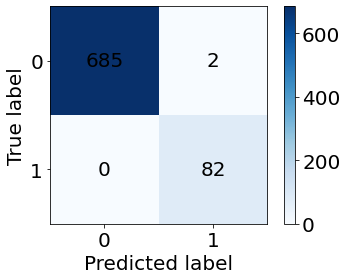

In [47]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(predict_y, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

[1]


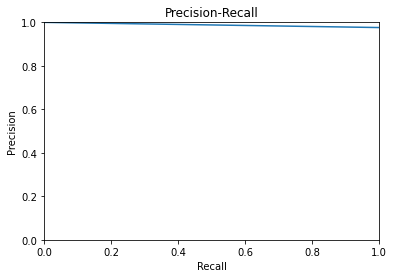

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, predict_y) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()

In [49]:
corrdf=data.corr()
corrdf

,gpsPdop,gpsNumSv,gpsSec,P_Sol_Status,AvionicsTemp,Lat,Lon,H,tas,Eu[0],...,elevatorCmd,rudderCmd,lonCmd,XaccBias,YaccBias,ZaccBias,AirHeight,WWest,WSouth,Jammer
gpsPdop,1.000000,-0.234634,-0.045842,0.063523,0.178332,0.150694,0.161161,-0.121958,-0.137200,0.166629,...,-0.191682,0.071393,0.018013,0.006322,-0.050946,0.042359,-0.143207,-0.066625,0.044012,0.162625
gpsNumSv,-0.234634,1.000000,-0.468722,-0.258311,-0.762855,-0.946884,-0.951386,0.719566,0.926694,-0.726410,...,0.862620,-0.499020,-0.116267,0.025268,0.257591,-0.339790,0.943205,0.563636,-0.480048,-0.846080
gpsSec,-0.045842,-0.468722,1.000000,-0.255043,0.096325,0.367168,0.320803,-0.213461,-0.394395,0.014606,...,-0.090324,0.155759,0.048774,-0.140194,-0.167229,0.421922,-0.384407,-0.430665,0.076728,0.312062
P_Sol_Status,0.063523,-0.258311,-0.255043,1.000000,0.506207,0.403854,0.395404,-0.224357,-0.320000,0.474704,...,-0.506260,0.212534,0.044415,0.126167,-0.130686,-0.171715,-0.319387,-0.175525,0.340965,0.458052
AvionicsTemp,0.178332,-0.762855,0.096325,0.506207,1.000000,0.794126,0.849744,-0.695607,-0.742844,0.808681,...,-0.902229,0.456009,0.101640,0.041917,-0.298337,0.183141,-0.762237,-0.504123,0.483972,0.726737
Lat,0.150694,-0.946884,0.367168,0.403854,0.794126,1.000000,0.979929,-0.655615,-0.948755,0.791329,...,-0.921223,0.531221,0.114726,-0.010135,-0.256051,0.333126,-0.963945,-0.559601,0.508046,0.853407
Lon,0.161161,-0.951386,0.320803,0.395404,0.849744,0.979929,1.000000,-0.774480,-0.951897,0.825410,...,-0.954003,0.543721,0.110886,-0.008930,-0.260223,0.336020,-0.971546,-0.555436,0.527449,0.856196
H,-0.121958,0.719566,-0.213461,-0.224357,-0.695607,-0.655615,-0.774480,1.000000,0.737802,-0.653549,...,0.727669,-0.460461,-0.010743,0.009332,0.211839,-0.275919,0.757811,0.399980,-0.435937,-0.658316
tas,-0.137200,0.926694,-0.394395,-0.320000,-0.742844,-0.948755,-0.951897,0.737802,1.000000,-0.769987,...,0.865022,-0.572597,0.028993,0.033232,0.271552,-0.342690,0.982895,0.550253,-0.510074,-0.817636
Eu[0],0.166629,-0.726410,0.014606,0.474704,0.808681,0.791329,0.825410,-0.653549,-0.769987,1.000000,...,-0.838015,0.747374,0.034341,0.019134,-0.271707,0.155659,-0.786663,-0.380390,0.463749,0.696942


In [50]:
corrdf['Jammer'].sort_values(ascending = False)

Jammer            1.000000
Lon               0.856196
Lat               0.853407
AvionicsTemp      0.726737
Eu[0]             0.696942
WSouth            0.559624
YMagFiled         0.511110
rudderCmd         0.463255
P_Sol_Status      0.458052
ZMagFiled         0.429471
acc[2]            0.428079
gpsSec            0.312062
InertVNED[2]      0.241911
ZaccBias          0.218115
gpsPdop           0.162625
XMagFiled         0.161257
pqr[2]            0.129898
InertVNED[0]      0.117072
XaccBias          0.099195
lonCmd            0.095710
Eu[2]            -0.029657
InertVNED[1]     -0.067917
Compass          -0.083610
pqr[0]           -0.247045
YaccBias         -0.283392
pqr[1]           -0.346322
acc[1]           -0.458647
WWest            -0.539402
H                -0.658316
aileronLeftCmd   -0.716213
acc[0]           -0.806853
elevatorCmd      -0.808793
tas              -0.817636
DynPressure      -0.818833
Eu[1]            -0.822157
AirHeight        -0.843884
gpsNumSv         -0.846080
N

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 1, 64)          1024      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 1, 64)          0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 50)             23000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             2

In [52]:
import os
from keras.utils.vis_utils import plot_model
os.environ["PATH"] += os.pathsep +'C:\Program Files\Graphviz/bin'

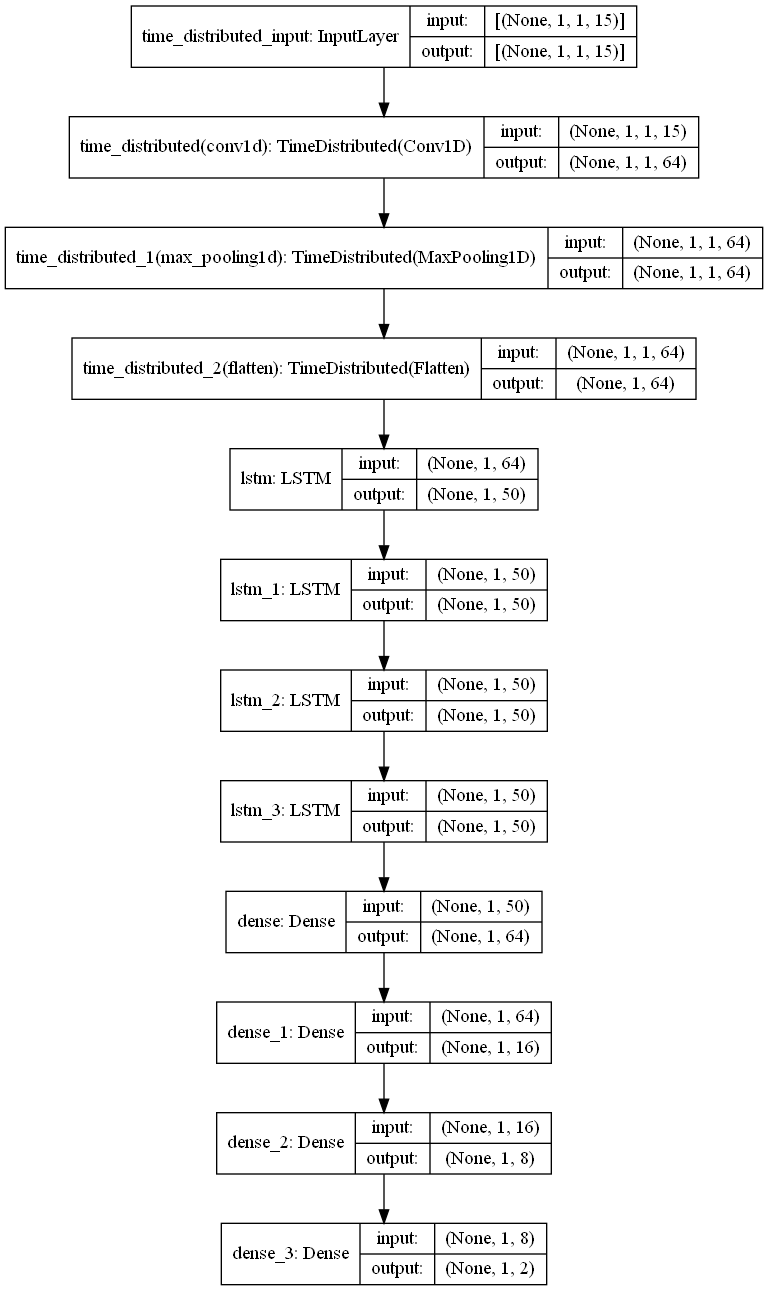

In [53]:
plot_model(model, to_file='lstm.png',show_shapes='True')